In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

Libraries imported successfully!


In [ ]:
# Load mushroom dataset
print("Loading dataset...")

mushroom = fetch_ucirepo(id=73)

X = mushroom.data.features
y = mushroom.data.targets

df = pd.concat([X, y], axis=1)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Loading mushroom dataset from UCI repository...
Dataset loaded successfully!
Dataset shape: (8124, 23)
Columns: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous']


In [ ]:
# Basic dataset information
print("Dataset Information:")
print("=" * 30)
print(f"Shape: {df.shape}")
print(f"Features: {len(df.columns) - 1}")
print(f"Target: {y.columns[0]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

df.info()

Dataset Information:
Shape: (8124, 23)
Number of features: 22
Target column: poisonous

First 5 rows:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring v

In [ ]:
# Check for missing values
print("Missing Values:")
print("=" * 30)

missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
}).sort_values('Missing Count', ascending=False)

print(missing_summary)

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
overall_missing_percentage = (total_missing / total_cells) * 100

print(f"\nTotal missing: {total_missing}")
print(f"Percentage: {overall_missing_percentage:.2f}%")

Missing Values Analysis:
Missing values summary:
                                            Column  Missing Count  \
stalk-root                              stalk-root           2480   
cap-shape                                cap-shape              0   
stalk-surface-below-ring  stalk-surface-below-ring              0   
habitat                                    habitat              0   
population                              population              0   
spore-print-color                spore-print-color              0   
ring-type                                ring-type              0   
ring-number                            ring-number              0   
veil-color                              veil-color              0   
veil-type                                veil-type              0   
stalk-color-below-ring      stalk-color-below-ring              0   
stalk-color-above-ring      stalk-color-above-ring              0   
stalk-surface-above-ring  stalk-surface-above-ring    

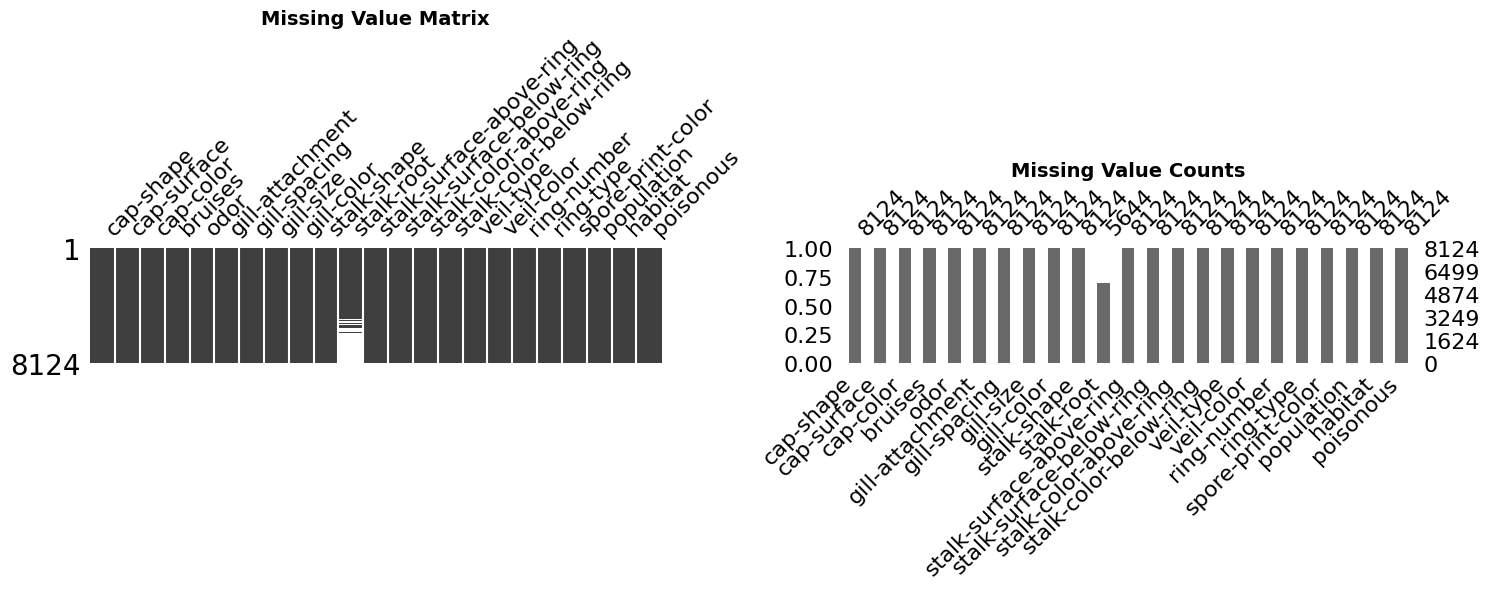

In [ ]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)
msno.matrix(df, ax=plt.gca())
plt.title('Missing Value Matrix')

plt.subplot(1, 2, 2)
msno.bar(df, ax=plt.gca())
plt.title('Missing Value Counts')

plt.tight_layout()
plt.show()

In [ ]:
# Handle missing values
print("Processing Missing Values:")
print("=" * 30)

df_processed = df.copy()

print("Sample of unique values:")
for col in df.columns[:10]:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals[:5]}... ({len(unique_vals)} unique)")

columns_with_missing = missing_summary[missing_summary['Missing Count'] > 0]['Column'].tolist()
print(f"\nColumns with missing values: {columns_with_missing}")

if columns_with_missing:
    for col in columns_with_missing:
        print(f"\nHandling '{col}':")
        print(f"  Missing: {df[col].isnull().sum()}")
        print(f"  Values: {df[col].unique()}")
        
        mode_value = df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown'
        df_processed[col] = df_processed[col].fillna(mode_value)
        print(f"  Filled with: {mode_value}")
else:
    print("No missing values found")

print(f"\nAfter processing: {df_processed.isnull().sum().sum()} missing values")

Processing Missing Values:
Unique values per column (first 10 columns):
cap-shape: ['x' 'b' 's' 'f' 'k']... (Total unique: 6)
cap-surface: ['s' 'y' 'f' 'g']... (Total unique: 4)
cap-color: ['n' 'y' 'w' 'g' 'e']... (Total unique: 10)
bruises: ['t' 'f']... (Total unique: 2)
odor: ['p' 'a' 'l' 'n' 'f']... (Total unique: 9)
gill-attachment: ['f' 'a']... (Total unique: 2)
gill-spacing: ['c' 'w']... (Total unique: 2)
gill-size: ['n' 'b']... (Total unique: 2)
gill-color: ['k' 'n' 'g' 'p' 'w']... (Total unique: 12)
stalk-shape: ['e' 't']... (Total unique: 2)

Columns with missing values: ['stalk-root']

Handling missing values in 'stalk-root':
  - Missing count: 2480
  - Unique values: ['e' 'c' 'b' 'r' nan]
  - Filled with mode: b

Processed dataset shape: (8124, 23)
Missing values after processing: 0


Creating Similarity Matrix:
Encoded 22 features for similarity analysis
Similarity matrix shape: (22, 22)


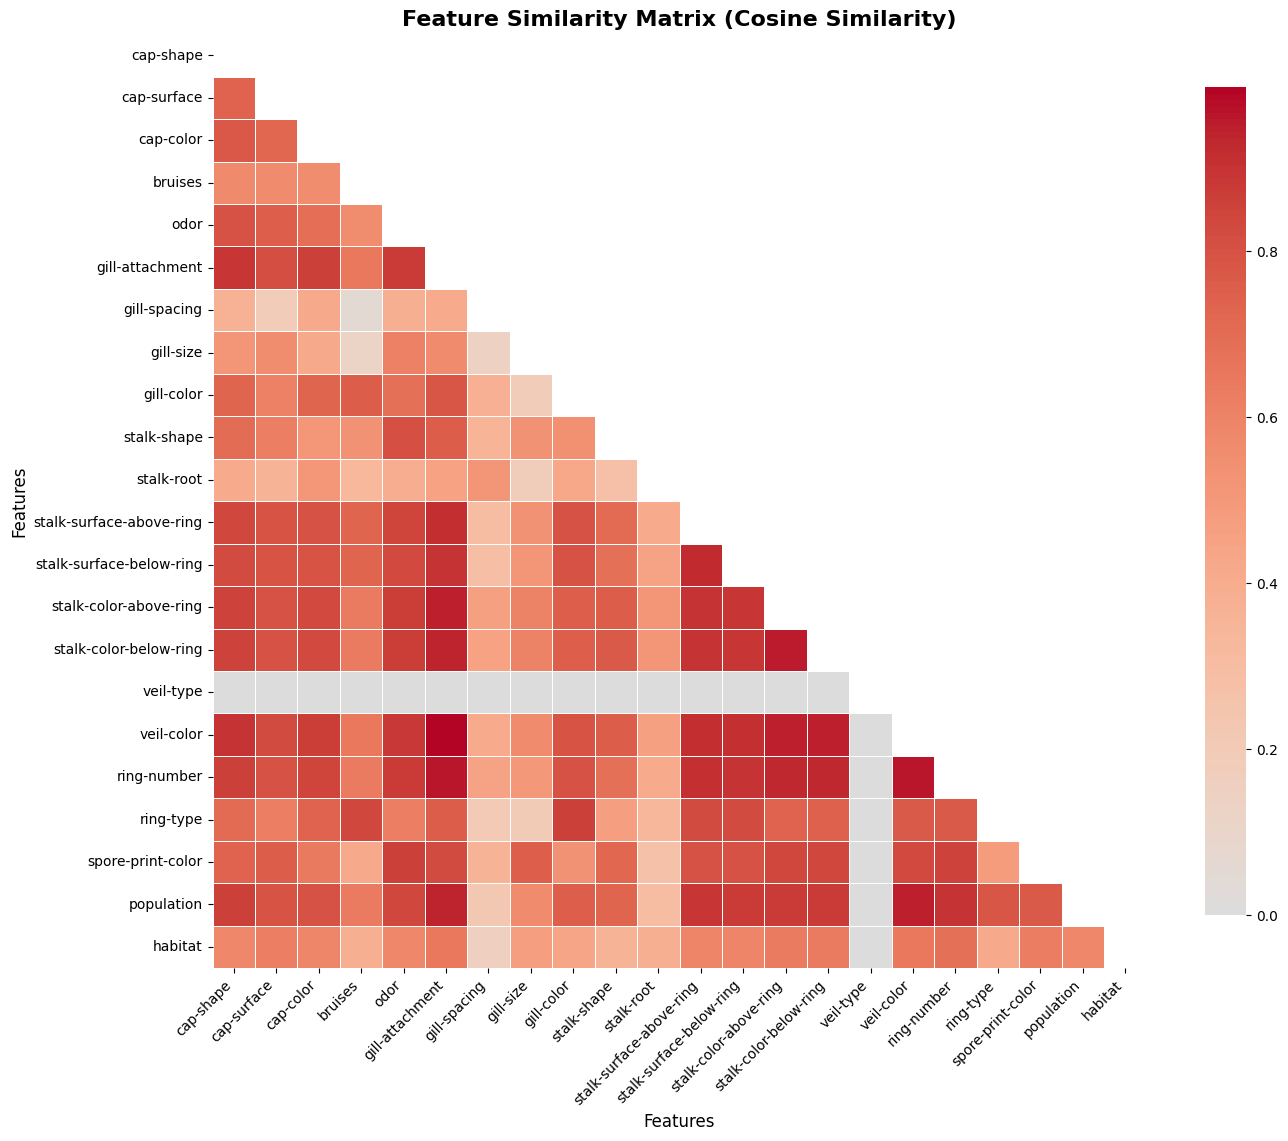


Top 10 Most Similar Feature Pairs:
----------------------------------------
 1. gill-attachment ↔ veil-color: 0.9972
 2. veil-color ↔ ring-number: 0.9631
 3. gill-attachment ↔ ring-number: 0.9604
 4. stalk-color-above-ring ↔ stalk-color-below-ring: 0.9506
 5. stalk-color-above-ring ↔ veil-color: 0.9459
 6. stalk-color-below-ring ↔ veil-color: 0.9452
 7. veil-color ↔ population: 0.9436
 8. gill-attachment ↔ stalk-color-above-ring: 0.9431
 9. gill-attachment ↔ stalk-color-below-ring: 0.9424
10. gill-attachment ↔ population: 0.9421

Lowest similarity: 0.0000
Highest similarity: 0.9972
Average similarity: 0.6017


In [ ]:
# Feature similarity matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import itertools

print("Similarity Matrix:")
print("=" * 30)

df_encoded = df_processed.copy()
label_encoders = {}

feature_cols = [col for col in df_processed.columns if col != target_col]

for col in feature_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

print(f"Encoded {len(feature_cols)} features")

feature_matrix = df_encoded[feature_cols].T
similarity_matrix = cosine_similarity(feature_matrix)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=feature_cols,
    columns=feature_cols
)

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(similarity_df, dtype=bool))
sns.heatmap(similarity_df, 
            annot=False,
            cmap='coolwarm',
            center=0,
            mask=mask,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Similarity Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 10 similar pairs:")
similarity_pairs = []
for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        similarity_pairs.append((
            feature_cols[i], 
            feature_cols[j], 
            similarity_matrix[i][j]
        ))

similarity_pairs.sort(key=lambda x: x[2], reverse=True)
for i, (feat1, feat2, sim) in enumerate(similarity_pairs[:10], 1):
    print(f"{i:2d}. {feat1} - {feat2}: {sim:.4f}")

print(f"\nRange: {similarity_pairs[-1][2]:.4f} to {similarity_pairs[0][2]:.4f}")
print(f"Average: {np.mean([pair[2] for pair in similarity_pairs]):.4f}")

Cramér's V Analysis:
Calculating Cramér's V for all feature pairs...
Total combinations to calculate: 253
✓ Cramér's V calculation completed!
✓ Cramér's V calculation completed!


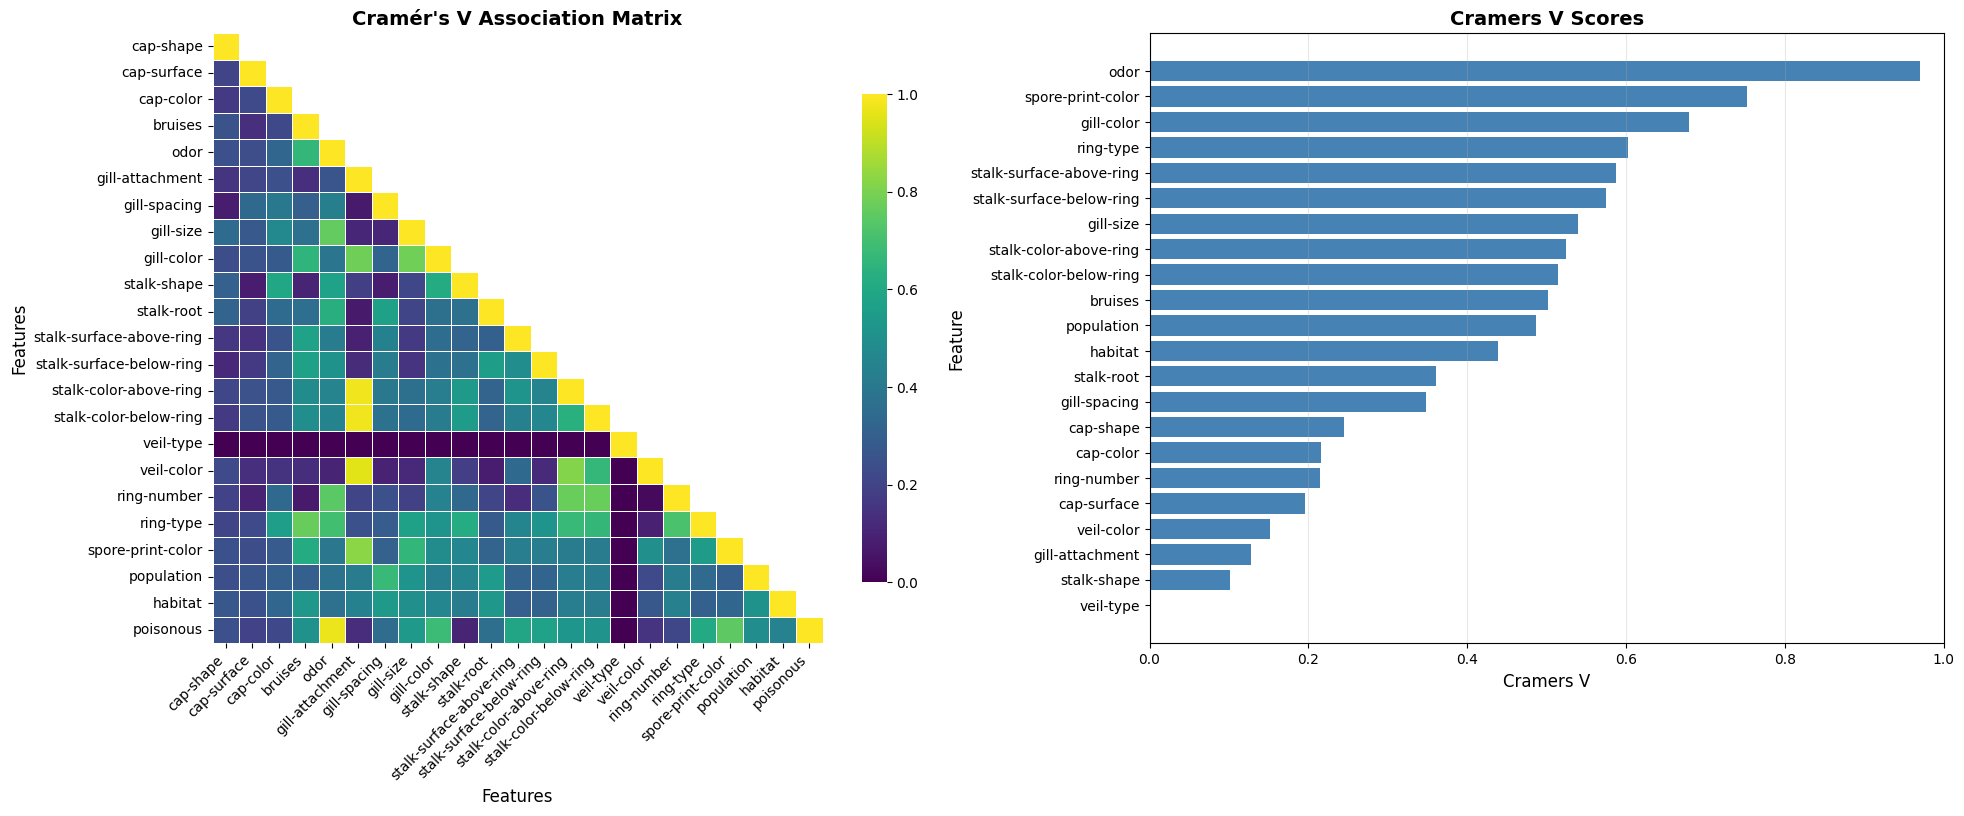

In [ ]:
# Cramér's V analysis
from scipy.stats import chi2_contingency
import itertools

print("Cramér's V Analysis:")
print("=" * 30)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p_value, dof, expected = chi2_contingency(confusion_matrix)
    
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    if min((kcorr-1), (rcorr-1)) == 0:
        return 0
    else:
        cramers_v_stat = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
        return cramers_v_stat

all_columns = df_processed.columns.tolist()
n_features = len(all_columns)

association_matrix = np.zeros((n_features, n_features))
p_values_matrix = np.zeros((n_features, n_features))

print("Calculating associations...")

for i in range(n_features):
    for j in range(i, n_features):
        if i == j:
            association_matrix[i][j] = 1.0
            p_values_matrix[i][j] = 0.0
        else:
            cramers_v_value = cramers_v(df_processed.iloc[:, i], df_processed.iloc[:, j])
            association_matrix[i][j] = cramers_v_value
            association_matrix[j][i] = cramers_v_value
            
            confusion_matrix = pd.crosstab(df_processed.iloc[:, i], df_processed.iloc[:, j])
            chi2, p_val, dof, expected = chi2_contingency(confusion_matrix)
            p_values_matrix[i][j] = p_val
            p_values_matrix[j][i] = p_val

cramers_v_df = pd.DataFrame(
    association_matrix,
    index=all_columns,
    columns=all_columns
)

p_values_df = pd.DataFrame(
    p_values_matrix,
    index=all_columns,
    columns=all_columns
)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

plt.subplot(1, 2, 1)
mask = np.triu(np.ones_like(cramers_v_df, dtype=bool), k=1)
sns.heatmap(cramers_v_df, 
            annot=False,
            cmap='viridis',
            vmin=0, vmax=1,
            mask=mask,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Cramér's V Association Matrix")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
# Cramér's V scores with target
target_cramers_v_scores = []
for col in all_columns:
    if col != target_col:
        target_idx = all_columns.index(target_col)
        col_idx = all_columns.index(col)
        cramers_v_score = association_matrix[target_idx][col_idx]
        target_cramers_v_scores.append((col, cramers_v_score))

target_cramers_v_scores.sort(key=lambda x: x[1], reverse=True)

feature_names = [item[0] for item in target_cramers_v_scores]
cramers_v_scores = [item[1] for item in target_cramers_v_scores]

bars = plt.barh(range(len(feature_names)), cramers_v_scores, color='steelblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Cramers V')
plt.title('Cramers V Scores')
plt.xlim(0, 1.0)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Analysis results
upper_triangle_indices = np.triu_indices_from(association_matrix, k=1)
cramers_v_values = association_matrix[upper_triangle_indices]
p_values_list = p_values_matrix[upper_triangle_indices]

feature_pairs = []
for i, j in zip(upper_triangle_indices[0], upper_triangle_indices[1]):
    feature_pairs.append((all_columns[i], all_columns[j]))

associations_data = list(zip(feature_pairs, cramers_v_values, p_values_list))
associations_data.sort(key=lambda x: x[1], reverse=True)

print("Top 10 associations:")
for i, ((feat1, feat2), cramers_v_val, p_val) in enumerate(associations_data[:10], 1):
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"{i:2d}. {feat1} - {feat2}: {cramers_v_val:.3f} {significance}")

print(f"\nTarget associations:")
target_associations = []
for i, col in enumerate(all_columns):
    if col != target_col:
        target_idx = all_columns.index(target_col)
        col_idx = i
        cramers_v_val = association_matrix[target_idx][col_idx]
        p_val = p_values_matrix[target_idx][col_idx]
        target_associations.append((col, cramers_v_val, p_val))

target_associations.sort(key=lambda x: x[1], reverse=True)

for i, (feat, cramers_v_val, p_val) in enumerate(target_associations[:5], 1):
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"{i}. {feat}: {cramers_v_val:.3f} {significance}")

print(f"\nStats: Mean={np.mean(cramers_v_values):.3f}, Max={np.max(cramers_v_values):.3f}")

Cramér's V Analysis Results:
TOP 15 STRONGEST ASSOCIATIONS (Cramér's V):
------------------------------------------------------------
 1. gill-attachment ↔ stalk-color-above-ring
     Cramér's V: 0.9773 | p-value: 0.00e+00 ***
 2. gill-attachment ↔ stalk-color-below-ring
     Cramér's V: 0.9773 | p-value: 0.00e+00 ***
 3. odor ↔ poisonous
     Cramér's V: 0.9706 | p-value: 0.00e+00 ***
 4. gill-attachment ↔ veil-color
     Cramér's V: 0.9550 | p-value: 0.00e+00 ***
 5. gill-attachment ↔ spore-print-color
     Cramér's V: 0.8264 | p-value: 0.00e+00 ***
 6. stalk-color-above-ring ↔ veil-color
     Cramér's V: 0.8160 | p-value: 0.00e+00 ***
 7. gill-size ↔ gill-color
     Cramér's V: 0.7832 | p-value: 0.00e+00 ***
 8. gill-attachment ↔ gill-color
     Cramér's V: 0.7793 | p-value: 0.00e+00 ***
 9. stalk-color-below-ring ↔ ring-number
     Cramér's V: 0.7713 | p-value: 0.00e+00 ***
10. stalk-color-above-ring ↔ ring-number
     Cramér's V: 0.7707 | p-value: 0.00e+00 ***
11. bruises ↔ ring-t

Data Visualization After Processing:


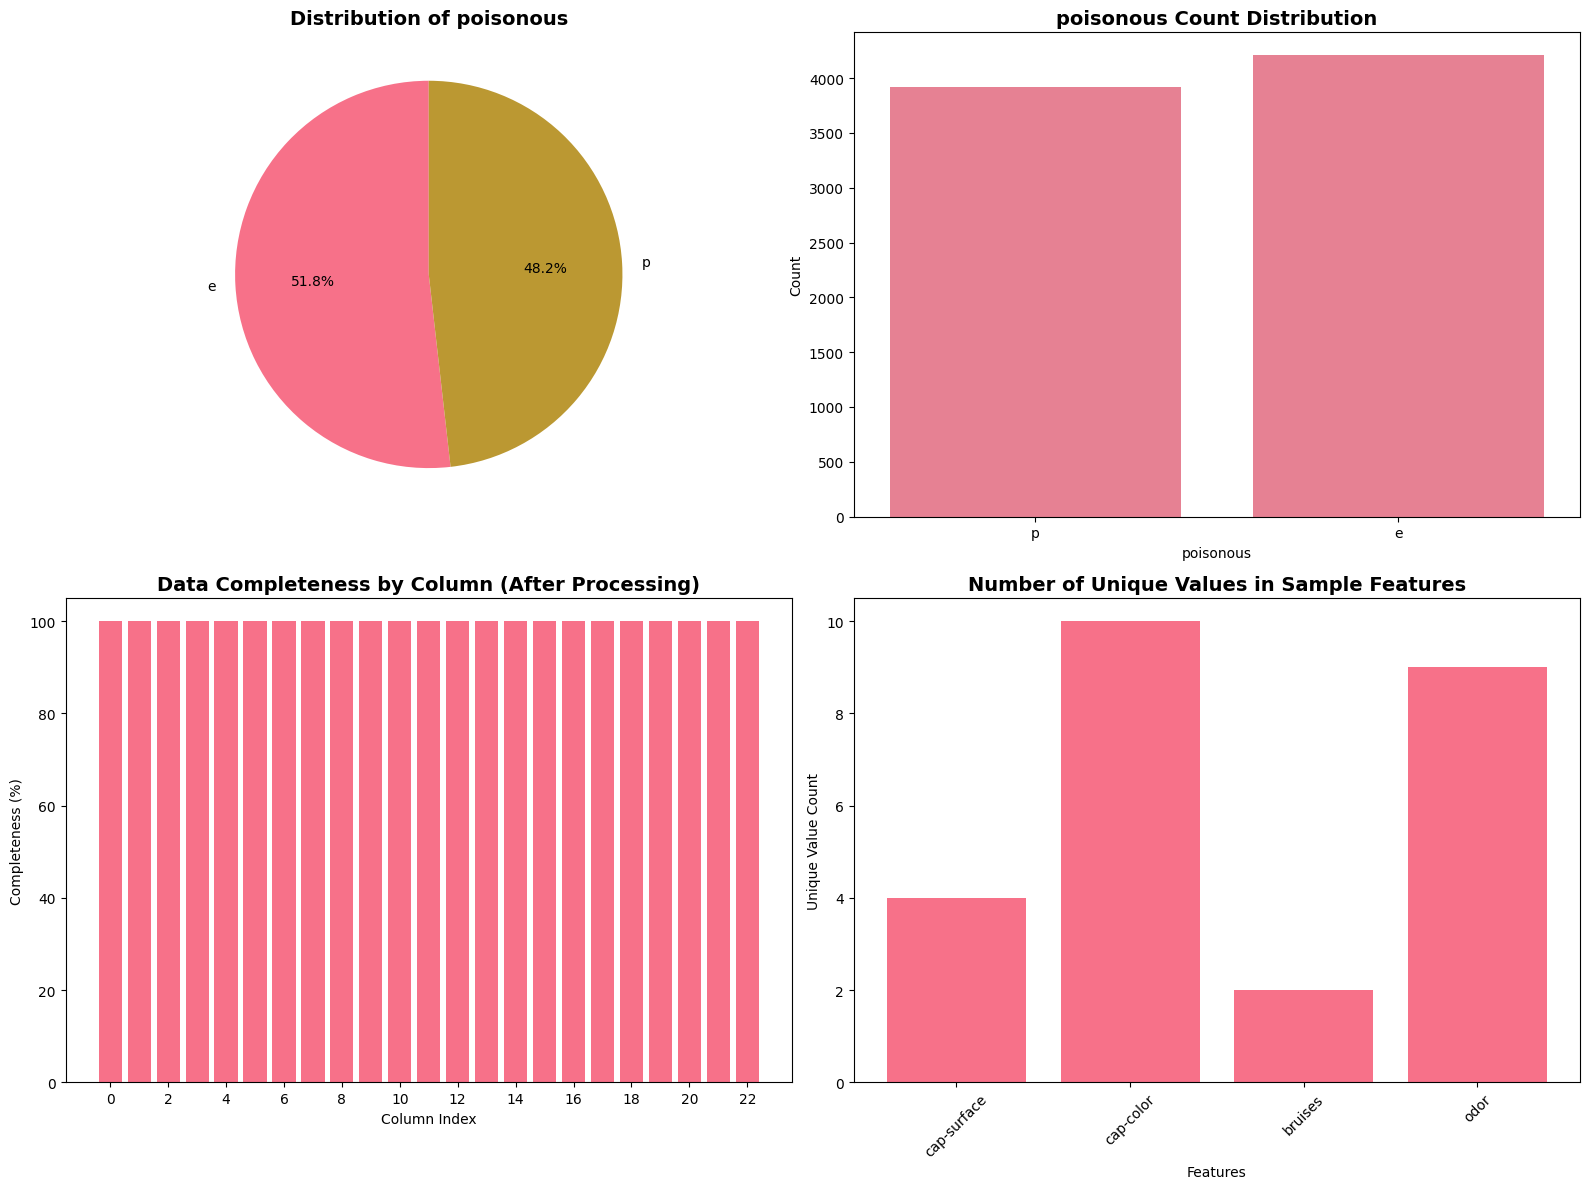

In [ ]:
# Data visualization
plt.rcParams['figure.figsize'] = (15, 10)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

target_col = y.columns[0]
plt.subplot(2, 2, 1)
target_counts = df_processed[target_col].value_counts()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f'{target_col} Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=df_processed, x=target_col)
plt.title(f'{target_col} Counts')

plt.subplot(2, 2, 3)
completeness = (1 - df_processed.isnull().sum() / len(df_processed)) * 100
plt.bar(range(len(completeness)), completeness.values)
plt.title('Data Completeness')
plt.ylabel('Completeness (%)')
plt.xticks(range(0, len(completeness), 2))

plt.subplot(2, 2, 4)
sample_features = df_processed.columns[1:5]
feature_counts = []
for feature in sample_features:
    feature_counts.append(len(df_processed[feature].unique()))

plt.bar(sample_features, feature_counts)
plt.title('Unique Values per Feature')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Feature Analysis Visualizations:


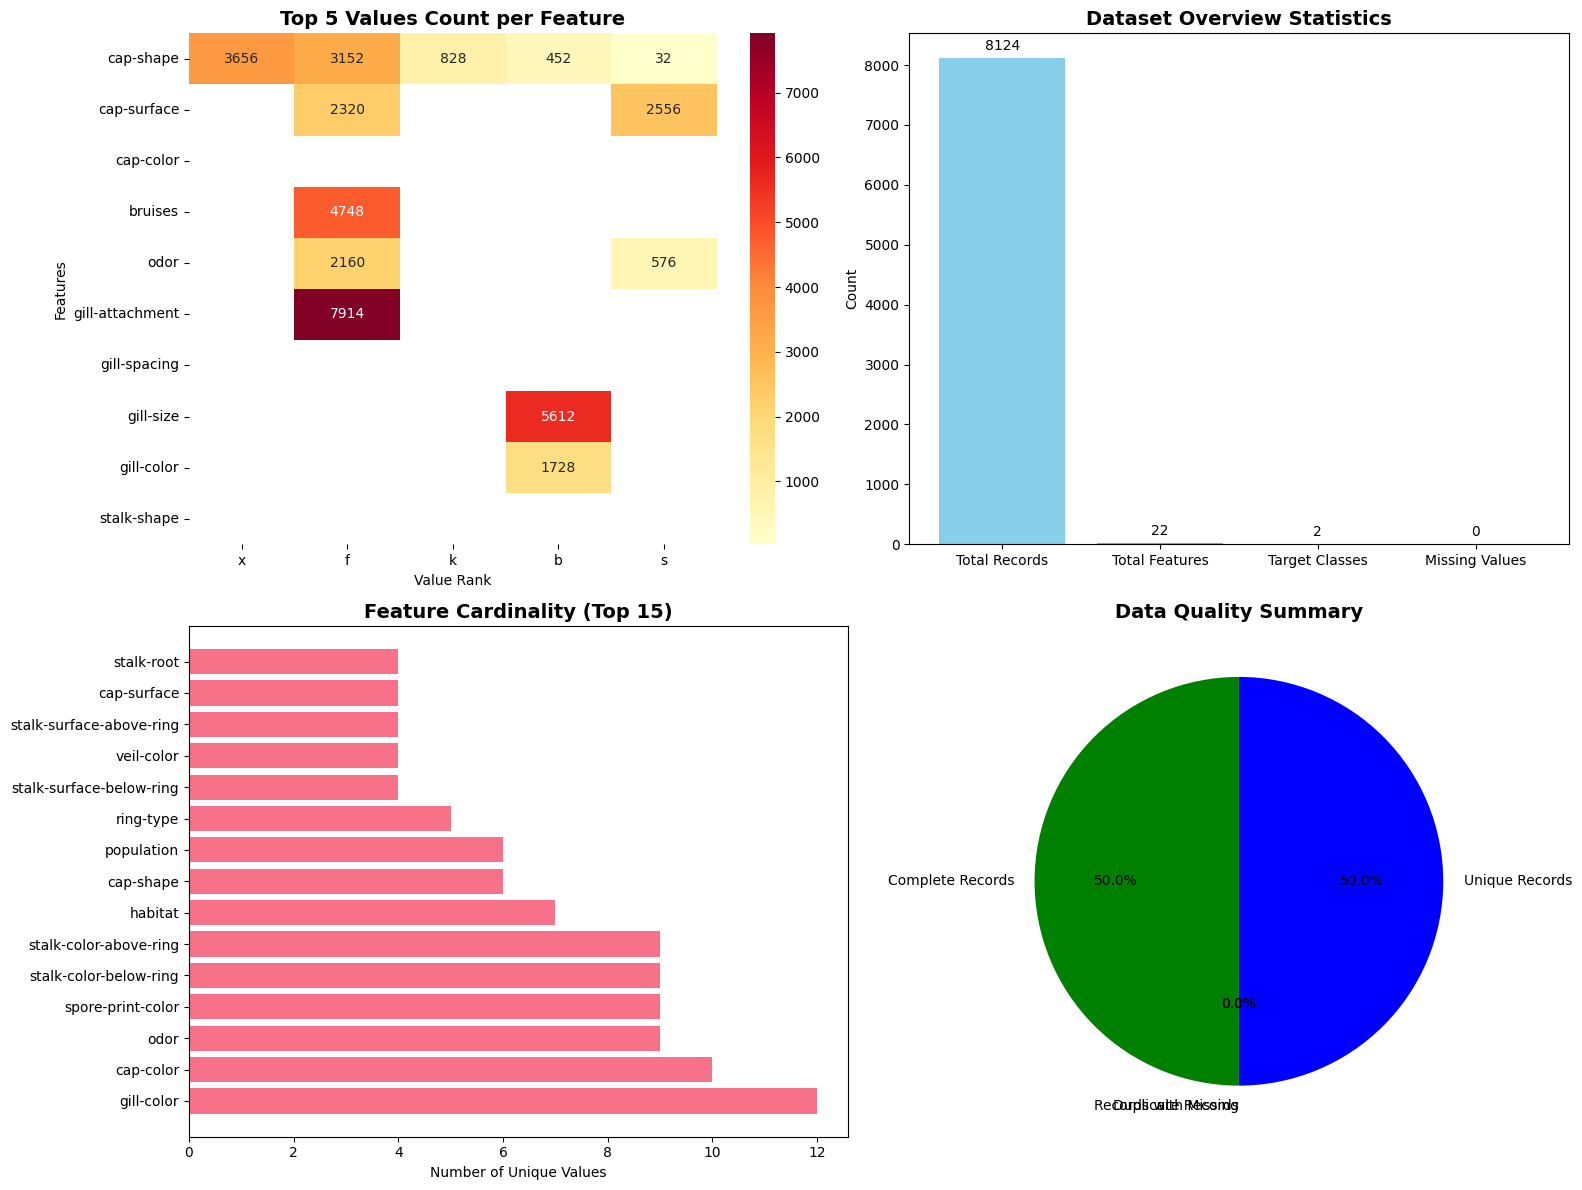

In [ ]:
# Feature analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

plt.subplot(2, 2, 1)
sample_cols = df_processed.columns[:10]
count_matrix = pd.DataFrame()
for col in sample_cols:
    if col in df_processed.columns:
        value_counts = df_processed[col].value_counts()
        count_matrix[col] = value_counts.reindex(value_counts.index[:5]).fillna(0)

if not count_matrix.empty:
    sns.heatmap(count_matrix.T, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Top 5 Values per Feature')

plt.subplot(2, 2, 2)
stats_data = {
    'Records': len(df_processed),
    'Features': len(df_processed.columns) - 1,
    'Classes': len(df_processed[target_col].unique()),
    'Missing': df_processed.isnull().sum().sum()
}

plt.bar(stats_data.keys(), stats_data.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Dataset Statistics')
for i, (key, value) in enumerate(stats_data.items()):
    plt.text(i, value + max(stats_data.values()) * 0.01, str(value), ha='center', va='bottom')

plt.subplot(2, 2, 3)
cardinality = df_processed.nunique().sort_values(ascending=False)[:15]
plt.barh(range(len(cardinality)), cardinality.values)
plt.yticks(range(len(cardinality)), cardinality.index)
plt.title('Feature Cardinality')

plt.subplot(2, 2, 4)
quality_metrics = {
    'Complete': len(df_processed.dropna()),
    'Missing': len(df_processed) - len(df_processed.dropna()),
    'Duplicates': df_processed.duplicated().sum(),
    'Unique': len(df_processed) - df_processed.duplicated().sum()
}

colors = ['green', 'red', 'orange', 'blue']
plt.pie(quality_metrics.values(), labels=quality_metrics.keys(), autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Data Quality')

plt.tight_layout()
plt.show()

PREPROCESSING SUMMARY
BEFORE PREPROCESSING:
  • Dataset shape: (8124, 23)
  • Total missing values: 2480
  • Missing percentage: 1.33%
  • Complete records: 5644

AFTER PREPROCESSING:
  • Dataset shape: (8124, 23)
  • Total missing values: 0
  • Missing percentage: 0.00%
  • Complete records: 8124

Processed dataset is ready for further analysis!
Target variable: poisonous
Target classes: ['p' 'e']


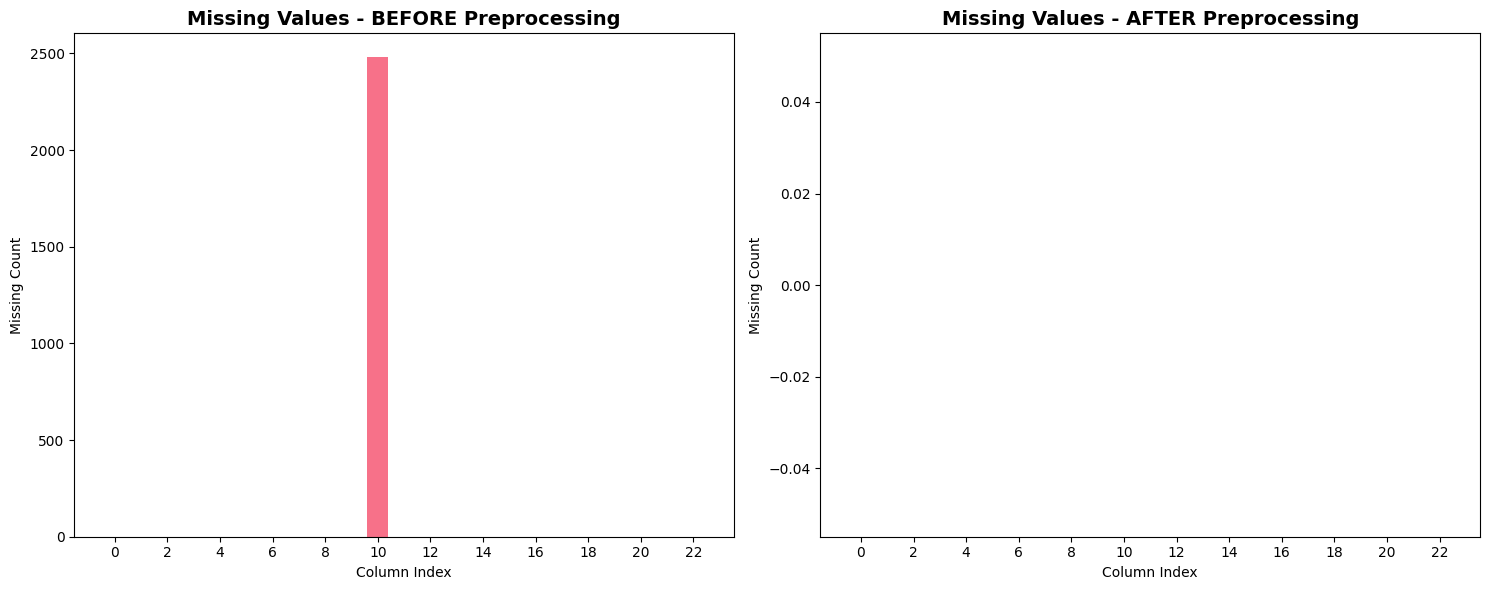


✓ Dataset successfully loaded from UCI repository
✓ Missing values analyzed and visualized
✓ Data preprocessing completed
✓ Comprehensive visualizations created


In [ ]:
# Summary
print("Summary:")
print("=" * 30)

print("Before preprocessing:")
print(f"  Shape: {df.shape}")
print(f"  Missing values: {df.isnull().sum().sum()}")
print(f"  Complete records: {len(df.dropna())}")

print("\nAfter preprocessing:")
print(f"  Shape: {df_processed.shape}")
print(f"  Missing values: {df_processed.isnull().sum().sum()}")
print(f"  Complete records: {len(df_processed.dropna())}")

print(f"\nTarget: {target_col}")
print(f"Classes: {df_processed[target_col].unique()}")

# Comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

missing_before = df.isnull().sum()
ax1.bar(range(len(missing_before)), missing_before.values)
ax1.set_title('Before Preprocessing')
ax1.set_ylabel('Missing Count')
ax1.set_xticks(range(0, len(missing_before), 2))

missing_after = df_processed.isnull().sum()
ax2.bar(range(len(missing_after)), missing_after.values)
ax2.set_title('After Preprocessing')
ax2.set_ylabel('Missing Count')
ax2.set_xticks(range(0, len(missing_after), 2))

plt.tight_layout()
plt.show()